In [1]:
import cv2
import numpy as np
import os
import xml.etree.ElementTree as ET



In [3]:
imgs = os.listdir('../dataset/newspaper/')

In [4]:
img = cv2.imread('../dataset/newspaper/' + imgs[0])

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
small_img = img[1000:2000,1800:2800]

In [7]:
cv2.imwrite('ocr/test.png', small_img)

True

In [8]:
all_words, words_on_line, max_height_on_line = get_words(thresh1)

NameError: name 'get_words' is not defined

In [9]:
import json

In [10]:
fin = open('../dataset/synthetic_words/desc.json', 'rb')
data = json.load(fin)
fin.close()

In [11]:
print data['abc']

ँःंअइउऋऊऌएकगखङघछचझजटञडठणढथतधदनफपभबयमरळलवषशहसऽ़िाुीृूॅॄेॆै्॑ॐ॒॓॔क़ज़ड़य़फ़ॡॠॣ॥।१०३२५४७६९८॰


In [12]:
uniques = {}

for t in data['train']:
    if len(t['text']) not in uniques:
        uniques[len(t['text'])] = 1
    else:
        uniques[len(t['text'])] += 1
    
for t in data['test']:
    if len(t['text']) not in uniques:
        uniques[len(t['text'])] = 1
    else:
        uniques[len(t['text'])] += 1


In [13]:
uniques

{1: 68,
 2: 1121,
 3: 7240,
 4: 21241,
 5: 34828,
 6: 44270,
 7: 43053,
 8: 39654,
 9: 31945,
 10: 24067,
 11: 16618,
 12: 10985,
 13: 6993,
 14: 4254,
 15: 2552,
 16: 1490,
 17: 891,
 18: 586,
 19: 301,
 20: 196,
 21: 126,
 22: 91,
 23: 58,
 24: 37,
 25: 33,
 26: 28,
 27: 9,
 28: 8,
 29: 7,
 30: 5,
 31: 9,
 32: 4,
 33: 7,
 34: 5,
 35: 11,
 36: 4,
 37: 1,
 38: 1,
 39: 2,
 40: 1,
 41: 5,
 42: 2,
 43: 1,
 44: 2,
 45: 1,
 46: 4,
 48: 2,
 49: 4,
 50: 1,
 51: 5,
 52: 1,
 54: 3,
 55: 1,
 56: 1,
 57: 1,
 61: 2,
 62: 1,
 63: 2,
 64: 1,
 65: 1,
 66: 2,
 69: 1,
 70: 1,
 72: 1,
 73: 1,
 75: 3,
 76: 1,
 77: 1,
 78: 1,
 79: 1,
 80: 1,
 88: 1,
 89: 1,
 98: 1,
 100: 1,
 101: 1,
 102: 1,
 107: 2,
 111: 1,
 114: 1,
 117: 2,
 125: 1,
 283: 1}

In [14]:
mapped = {u'\u0906': u'\u0905\u093e', 
          u'\u090e': u'\u090f\u0946',
u'\u0912': u'\u0905\u093e\u0946',
u'\u094a': u'\u093e\u0946',
u'\u090d': u'\u090f\u0945',
u'\u0911': u'\u0905\u093e\u0945',
u'\u0949': u'\u093e\u0945',
u'\u0908': u'\u0907\u0954',
u'\u0910': u'\u090f\u0947',
u'\u0914': u'\u0905\u093e\u0948',
u'\u094c': u'\u093e\u0948',
u'\u0913': u'\u0905\u093e\u0947',
u'\u094b': u'\u093e\u0947'}

In [15]:
n_abc = {}
n_train = []
n_test = []

for t in data['train']:
    ntext = ''
    for ch in t['text']:
        if ch in mapped:
            ntext += mapped[ch]
        else:
            ntext += ch
            
    for ch in ntext:
        if ch not in n_abc:
            n_abc[ch] = 1
            
    n_train.append({'text': ntext, 'name': t['name']})
    
    
for t in data['test']:
    ntext = ''
    for ch in t['text']:
        if ch in mapped:
            ntext += mapped[ch]
        else:
            ntext += ch
    
    for ch in ntext:
        if ch not in n_abc:
            n_abc[ch] = 1
    
    n_test.append({'text': ntext, 'name': t['name']})

In [16]:
n_abc = ''.join(n_abc.keys())

In [17]:
desc = {'abc':n_abc, 'train': n_train, 'test': n_test}

In [18]:
fout = open('../dataset/synthetic_words/desc.json', 'wb')
data = json.dump(desc, fout)
fout.close()

In [19]:
data.keys()

AttributeError: 'NoneType' object has no attribute 'keys'

In [20]:
xmls = os.listdir('../dataset/newspaper/')

In [ ]:
word_no = 1

for xml in xmls:
    if 'xml' in xml:
        img = cv2.imread('../dataset/newspaper/' + xml[:-3] + 'jpg')
        tree = ET.parse('../dataset/newspaper/' + xml)
        root = tree.getroot()
        for obj in root.findall('object'):
            bndbox = obj.find('bndbox')
            xmin = int(bndbox[0].text)
            ymin = int(bndbox[1].text)
            xmax = int(bndbox[2].text)
            ymax = int(bndbox[3].text)
            
            word_img = img[ymin:ymax, xmin:xmax, :]
            
            cv2.imwrite('../dataset/newspaper_words/' + str(word_no).zfill(10) + '.png', word_img)
                
            word_no += 1

In [6]:
from gen_word_img import *

In [7]:
fin = open('../dataset/newspaper_words/newspaper_words.list', 'rb')
data = fin.read()
fin.close()

In [8]:
to_unichr = {}
start = ord(u'\u0900')
for j in range(8):
    for i in range(10) + ['a','b','c','d','e','f']:
        to_unichr[str(j) + str(i)] = unichr(start)
        start += 1


मार्कशीट 1


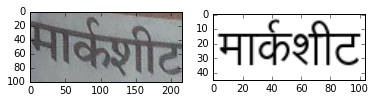

बुकलेट 2


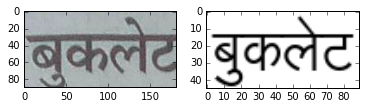

निर्देश 3


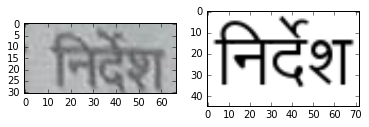

अधिकारियो 4


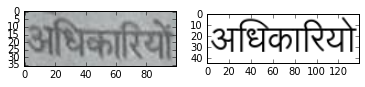

निर्देशानुसार 5


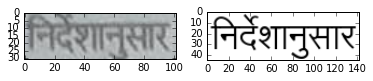

प्राथमिक 6


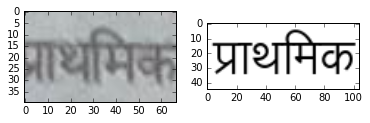

बुकलेट 7


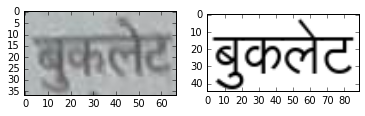

मामले 8


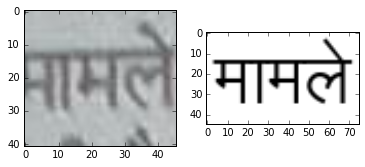

निरस्त 9


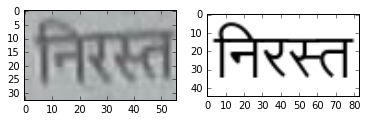

लगाने 10


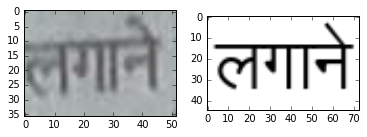

अमिताव 11


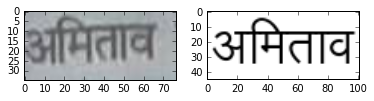

इनकार 12


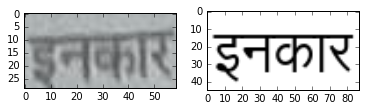

खिलाफ 13


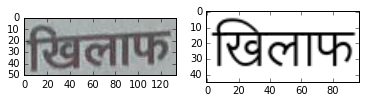

इनकार 14


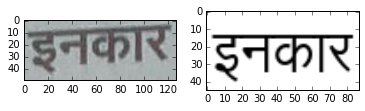

घड़ियां 15


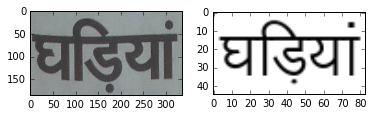

अलमारियों 16


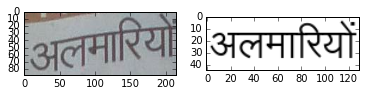

ठिकाने 17


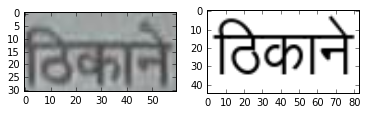

आलीशान 18


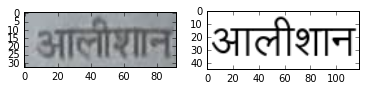

जब्त 19


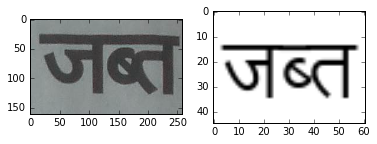

घोटालों 20


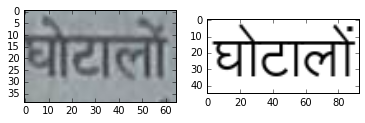

मंत्रालय 21


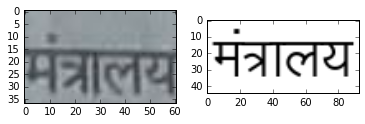

भूमिका 22


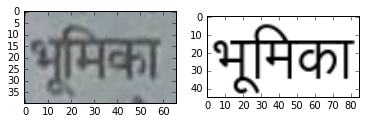

कारण 23


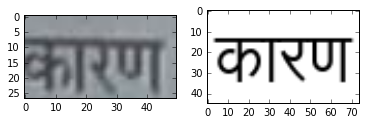

निर्देश 24


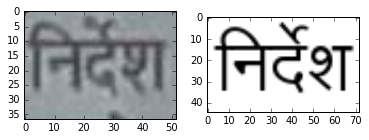

ज्यादा 25


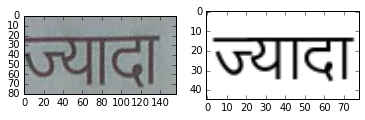

रुपये 26


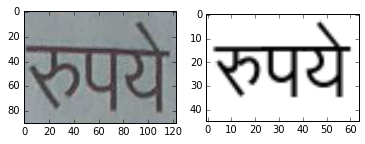

पेश 27


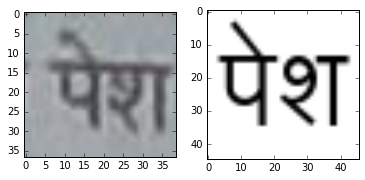

प्रवक्ता 28


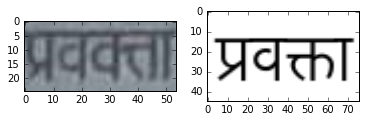

फैसला 29


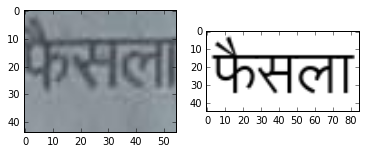

संसदीय 30


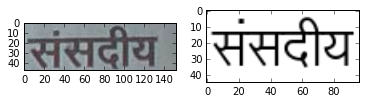

क्षेत्र 31


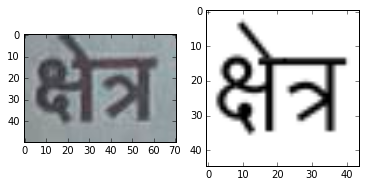

चुकाने 32


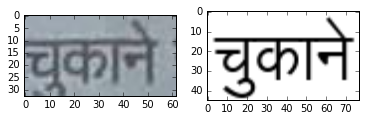

बजट 33


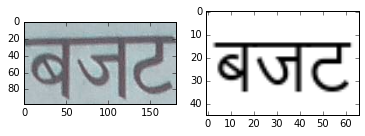

होली 34


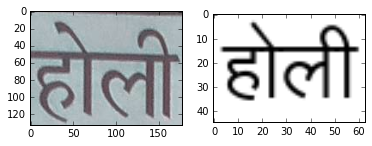

शॉपिंग 35


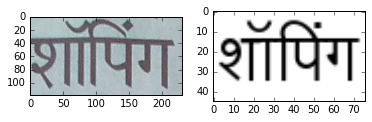

भिगाएंगे 36


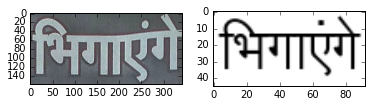

पिचकारी 37


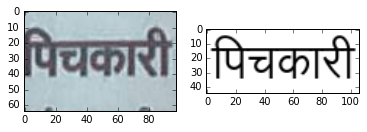

परिवार 38


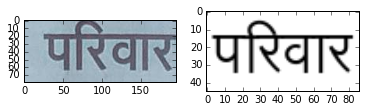

पारंपरिक 39


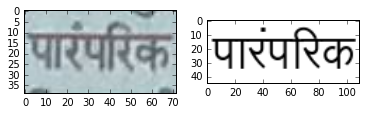

मार्केट 40


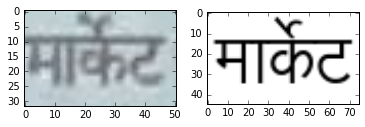

सप्लाई 41


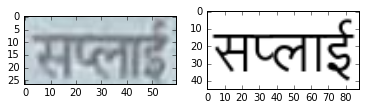

ट्रांसपोर्टेशन 42


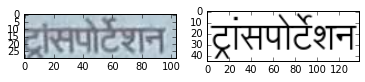

जनकपुरी 43


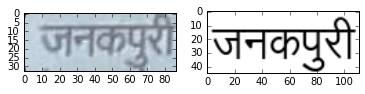

किफायती 44


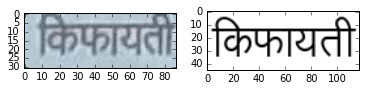

पिचकारियां 45


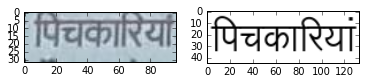

स्किन 46


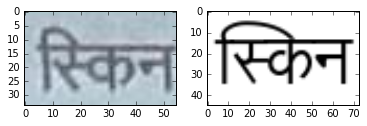

चलाया 47


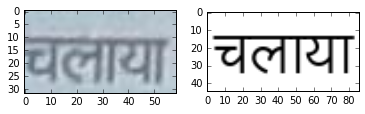

शॉपिंग 48


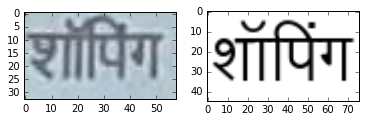

पिचकारियों 49


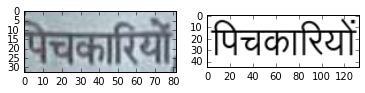

और 50


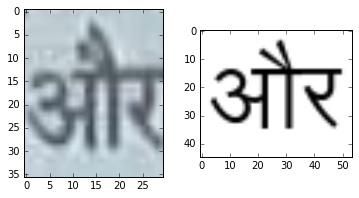

टोपियों 51


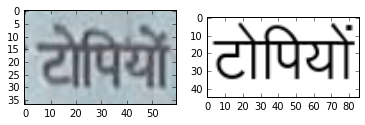

फिलहाल 52


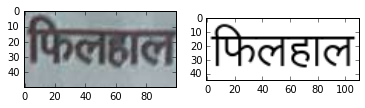

माल 53


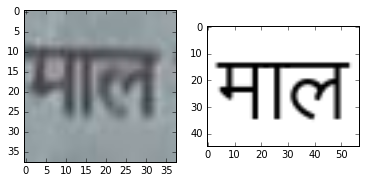

बिजनेस 54


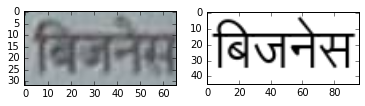

सामान 55


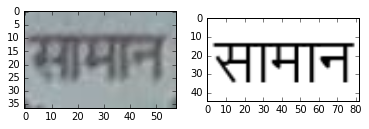

महीना 56


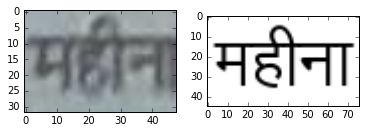

परफेक्ट 57


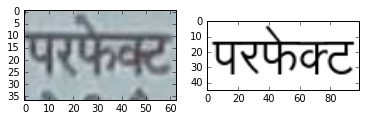

मैचिंग 58


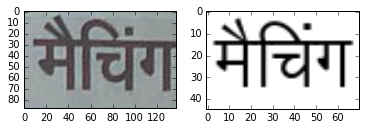

हिस्सा 59


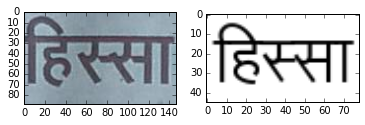

जूलरी 60


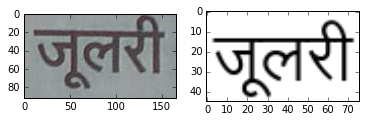

डिजाइन 61


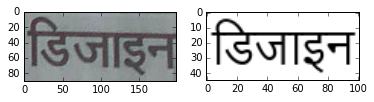

करो 62


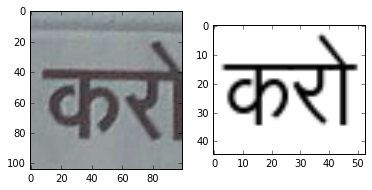

बड़ी 63


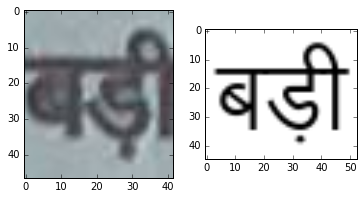

एक्टिंग 64


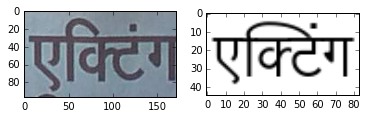

वर्कशॉप 65


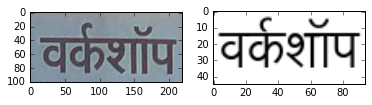

में 66


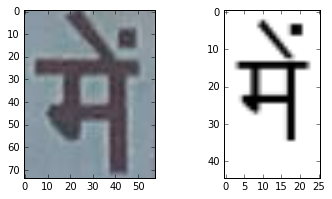

चांस 67


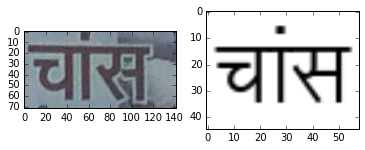

स्किन 68


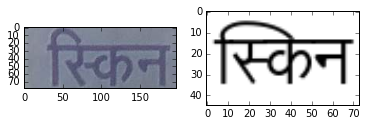

नुकसान 69


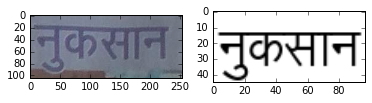

जिंदगी 70


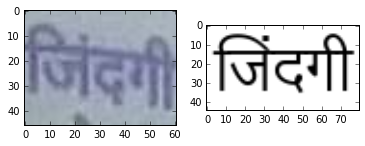

रौशनी 71


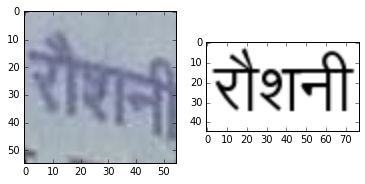

रजिस्ट्रेशन 72


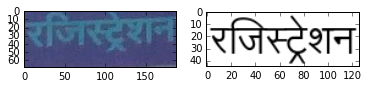

पक्की 73


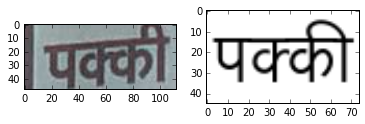

मनाएं 74


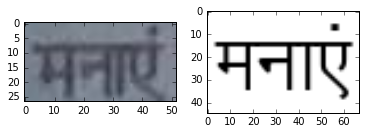

खुशनुमा 75


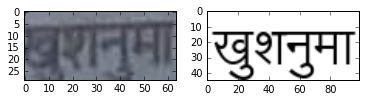

नोट 76


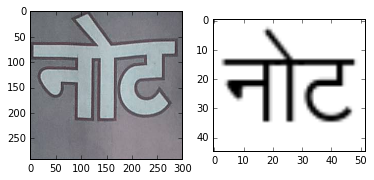

सरकार 77


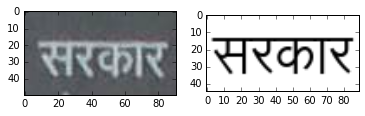

पार्टिसिपेंट्स 78


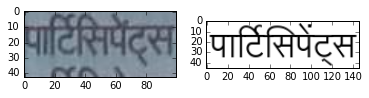

फेयरवेल 79


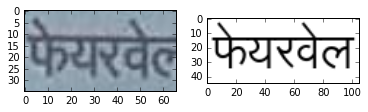

पिचकारी 80


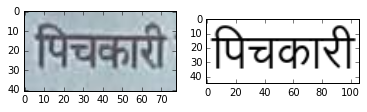

दूकानदार 81


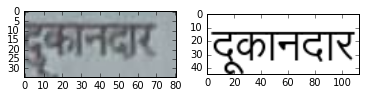

इस्तेमाल 82


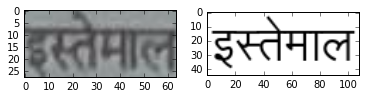

वीकेंड 83


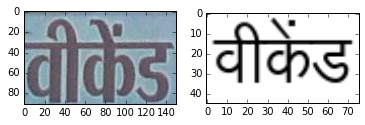

मस्ती 84


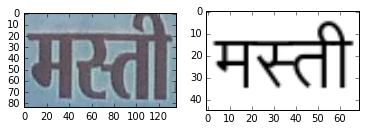

होली 85


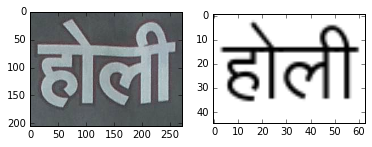

क्लीवेज 86


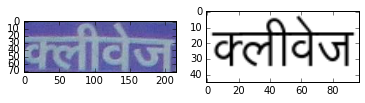

महिलाओं 87


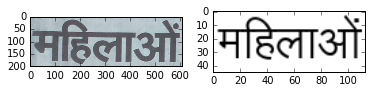

हंगामा 88


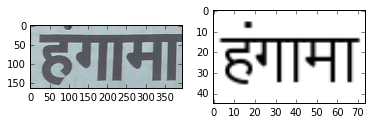

क्यों 89


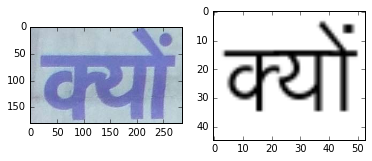

कनाडाई 90


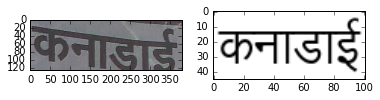

हीरोइनें 91


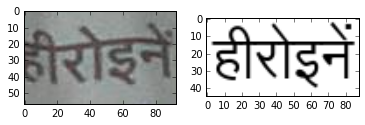

स्टाइल 92


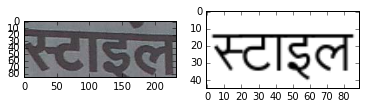

भंगड़ा 93


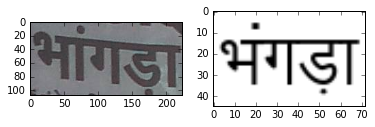

पुलिसवालों 94


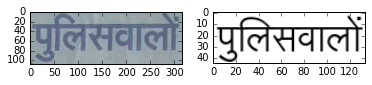

बरपा 95


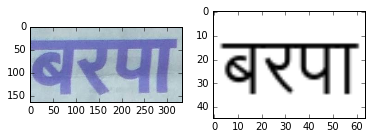

राजनीति 96


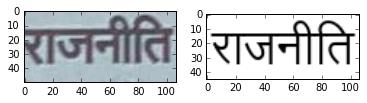

कैलेंडर 97


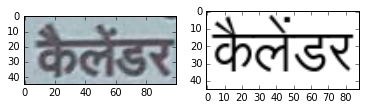

जरुरत 98


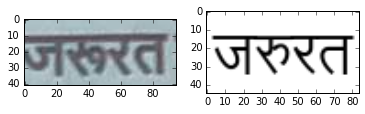

बलात्कार 99


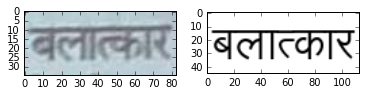

In [10]:
lines = data.split('\n')
i = 1
for line in lines:
    line = line.replace(' ','')
    fig = plt.figure(figsize=(6,3))
    img = cv2.imread('../dataset/newspaper_words/' + str(i).zfill(10) + '.png')
    uni = u''
    
    if line.isalpha():
        uni = line
    else:
        for j in range(0,len(line),3):
            uni += (line[j] + line[j+1] + line[j+2]).decode('utf-8')
            #uni += to_unichr[line[j:j+2]]
    print uni, i
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(img, cmap='gray')
    img = scribe_wrapper(uni, "Devanagri 24", 45, 5, 0, 0)
    img = horztrim(img, 3)
    img = 255 - img
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(img, cmap='gray')
    plt.show()
    i += 1
    
    if i == 100:
        break

In [50]:
fin = open('../dataset/incorrect', 'rb')
data = fin.read()
fin.close()

In [1]:
for line in data.split():
    print line
    img = cv2.imread('../dataset/newspaper_words/' + line.zfill(10) + '.png')
    plt.figure(figsize=(2,10)) 
    plt.imshow(img, shape=(10,10))
    plt.show()

NameError: name 'data' is not defined

In [108]:
labels = []
i = 1
for line in data.split('\n'):
    uni = u''
    line = line.strip()
    for j in range(0,len(line),3):
        uni += (line[j] + line[j+1] + line[j+2]).decode('utf-8')
    labels.append([str(i).zfill(10) + '.png', uni])
    i += 1
    
labels = labels[:-1]

In [109]:
fin = open('../dataset/synthetic_words/desc.json', 'rb')
synth_desc = json.load(fin)
fin.close()

In [110]:
real_desc = {'abc': synth_desc['abc']}

In [111]:
train = []
for label in labels[:int(len(labels)*0.7)]:
    train.append({"text":label[1], "name":label[0]})
    
test = []
for label in labels[int(len(labels)*0.7):]:
    test.append({"text":label[1], "name":label[0]})


In [112]:
real_desc['train'] = train
real_desc['test'] = test

In [113]:
fout = open('../dataset/newspaper_words/desc.json', 'wb')
json.dump(real_desc, fout)
fout.close()